In [1]:
import numpy as np
#from scipy import misc
from skimage.io import imread, imsave
from skimage import exposure, color
from skimage import img_as_ubyte, img_as_float
import matplotlib.pyplot as plt
#import matplotlib.pylab as pylab

In [9]:
from PIL import Image
from matplotlib import cm

Image size: (768, 764)
Image Bit Resolution: uint8


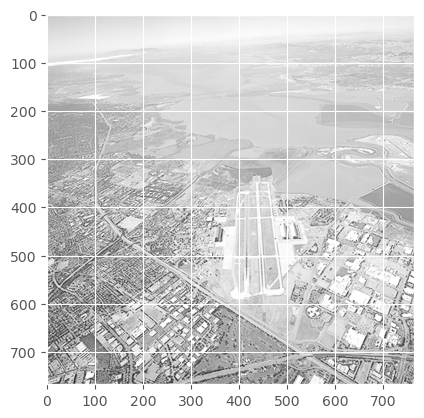

In [14]:
#ITrying to implement the histogram equalization algorithm

# Read the image as a numpy array
img = np.array(Image.open('chap3_images/aerialview-washedout.tif'))
plt.imshow(img, cmap=cm.gray)

# What are some image details
print(f"Image size: {img.shape}")
print(f"Image Bit Resolution: {img.dtype}")

In [15]:
#Get the histogram manually
histogram = np.full(256,0, 'uint')
intensity_values = np.arange(0,256)
for r in img.flatten():
    histogram[r] += 1

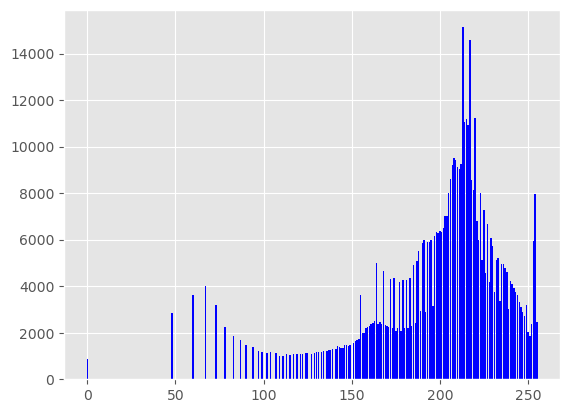

In [20]:
#plot the histogram
plt.bar(intensity_values, histogram, color='b')
plt.show()

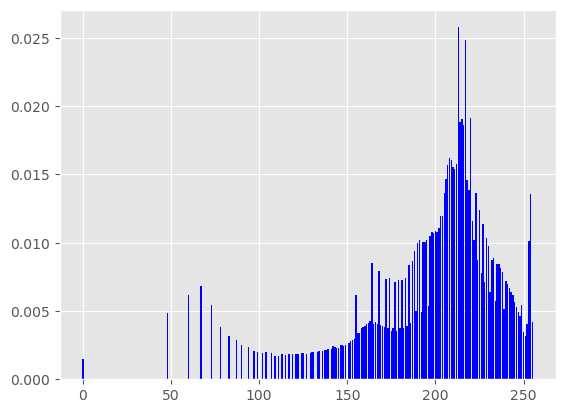

In [22]:
#Normalized histogram
normalized_histogram = histogram / (img.shape[0] * img.shape[1])
plt.bar(intensity_values, normalized_histogram, color='b')
plt.show()

In [29]:
np.sum(normalized_histogram[:256])

1.0

In [33]:
equalized_hist = np.full(256,0, 'float')
for i in range(256):
    equalized_hist[i] = np.sum(normalized_histogram[:i+1])
    

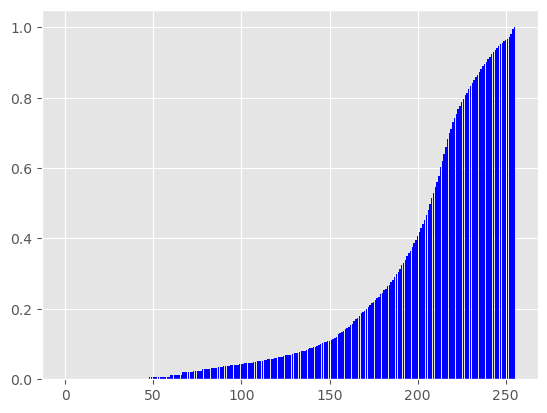

In [34]:
#plot the histogram
plt.bar(intensity_values, equalized_hist, color='b')
plt.show()

In [35]:
new_intensity_values = 255 * equalized_hist
equalized_img = np.vectorize(lambda x: round(new_intensity_values[x]))(img)
# for i in range(img.shape[0]):
#     for j in range(img.shape[1]):
#         equalized_img[]

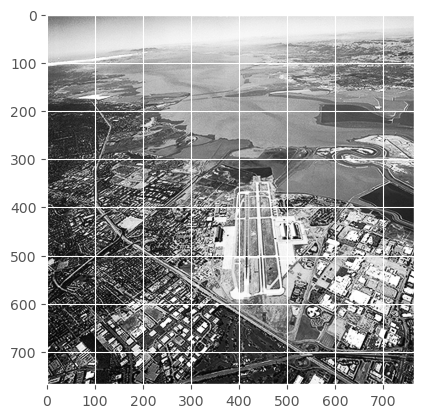

In [36]:
plt.imshow(equalized_img, cmap=cm.gray)

Examples of histogram processing using library functions in skimage.exposure

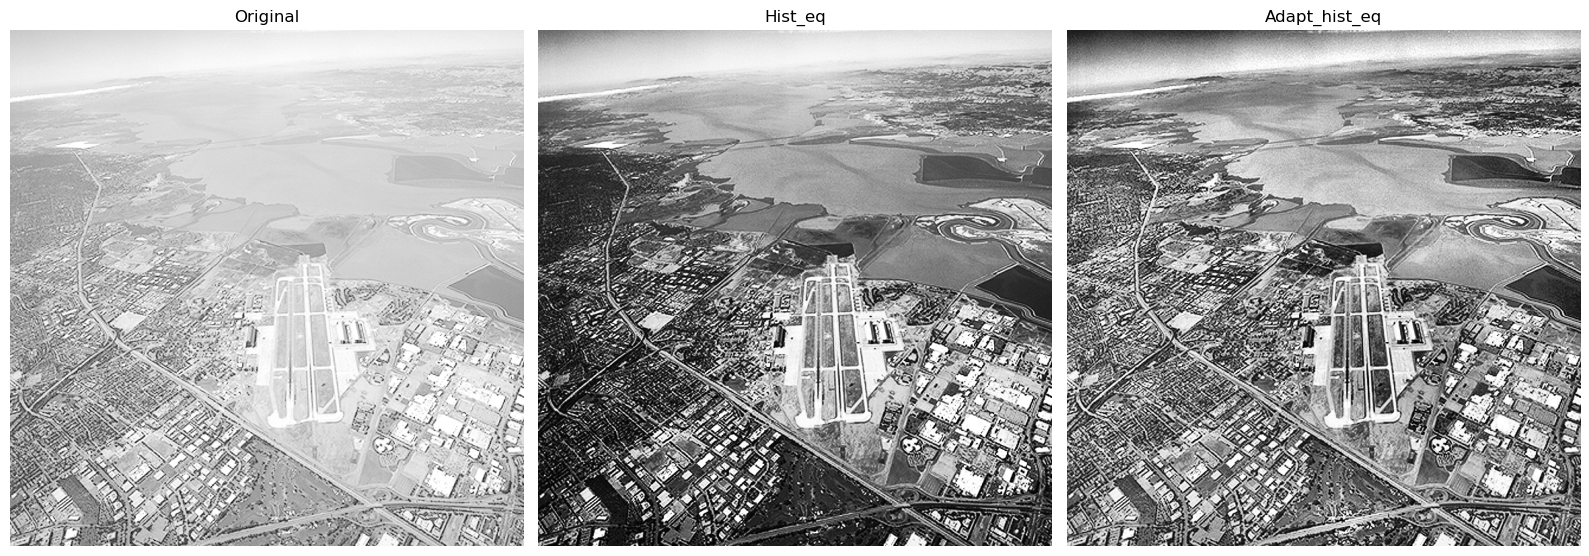

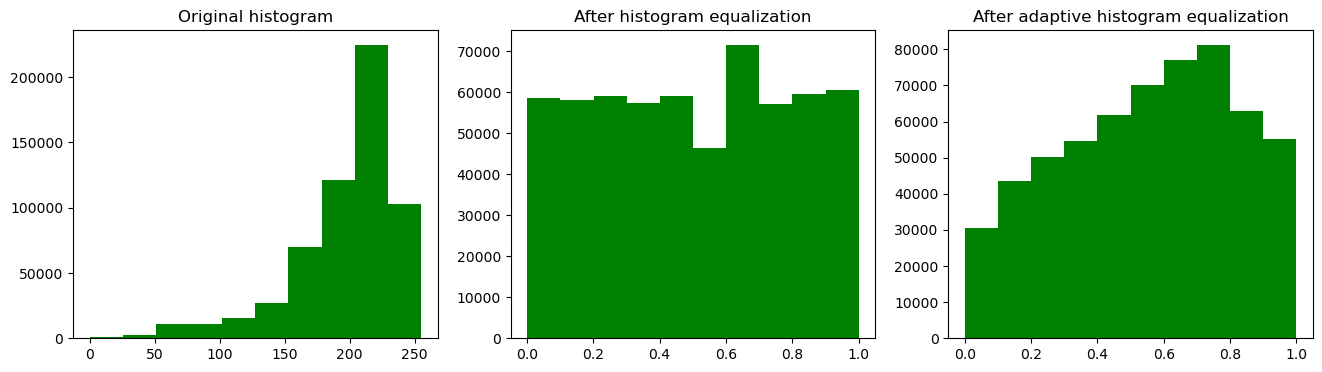

In [3]:
img = imread('chap3_images/aerialview-washedout.tif')
# histogram equalization
img_eq = exposure.equalize_hist(img)
# adaptive histogram equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
images = [img, img_eq, img_adapteq]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8), sharex=True, sharey=True)
ax=axes.ravel()
ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(img_eq, cmap='gray')
ax[1].set_title('Hist_eq')

ax[2].imshow(img_adapteq, cmap=plt.cm.gray)
ax[2].set_title('Adapt_hist_eq')
for a in ax:
    a.axis('off')

titles = ['Original histogram', 'After histogram equalization', 'After adaptive histogram equalization']
plt.figure(figsize=(16,4))
for i in range(3):
          plt.subplot(1,3,i+1), plt.hist(np.ravel(images[i]), color='g'),
          plt.title(titles[i], size=12)

fig.tight_layout()
plt.show()

Reading the channels of a color image separately. 

<function matplotlib.pyplot.show(close=None, block=None)>

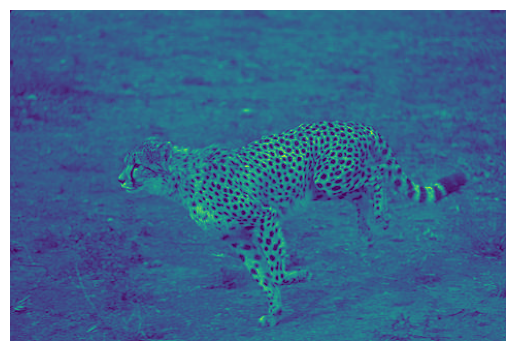

In [4]:
cheetah = imread('chap3_images/cheetah.png')
cheetah_r = cheetah[:,:,0]
cheetah_g = cheetah[:,:,1]
cheetah_b = cheetah[:,:,2]
plt.imshow(cheetah_b)
plt.axis('off')
plt.show

Plotting the histograms of R, G, B channels of a color image in the same axes.

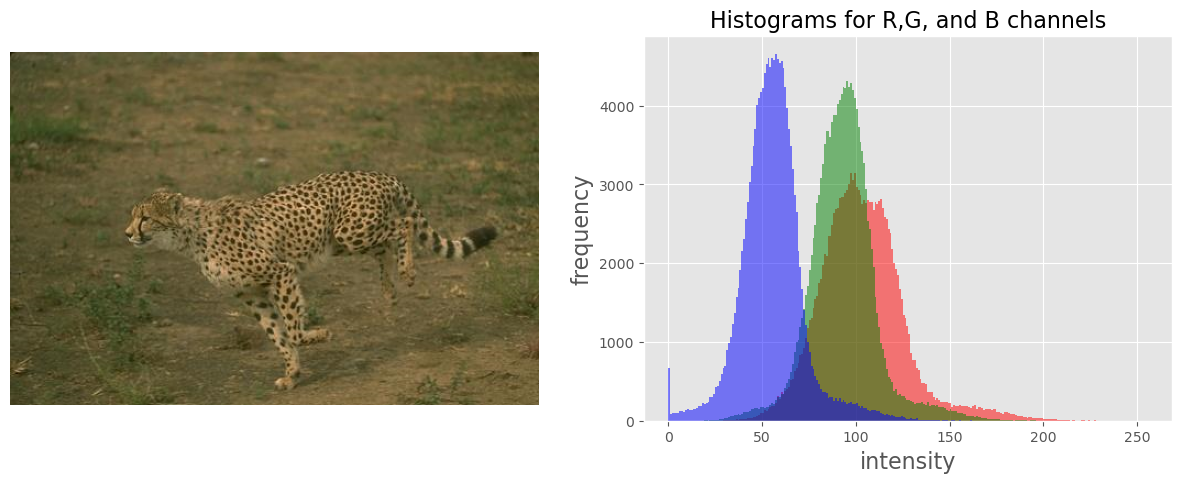

In [6]:
def plot_hist(r, g, b, title=''):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    plt.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    plt.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    plt.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    plt.xlabel('intensity', size=16), plt.ylabel('frequency', size=16)
    plt.title(title, size=16)
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.axis('off')
plt.imshow(cheetah)
plt.subplot(122)
plot_hist(cheetah_r, cheetah_g, cheetah_b, 'Histograms for R,G, and B channels')
plt.show()

Examples of performing contrast stretching and histogram equalizations. 

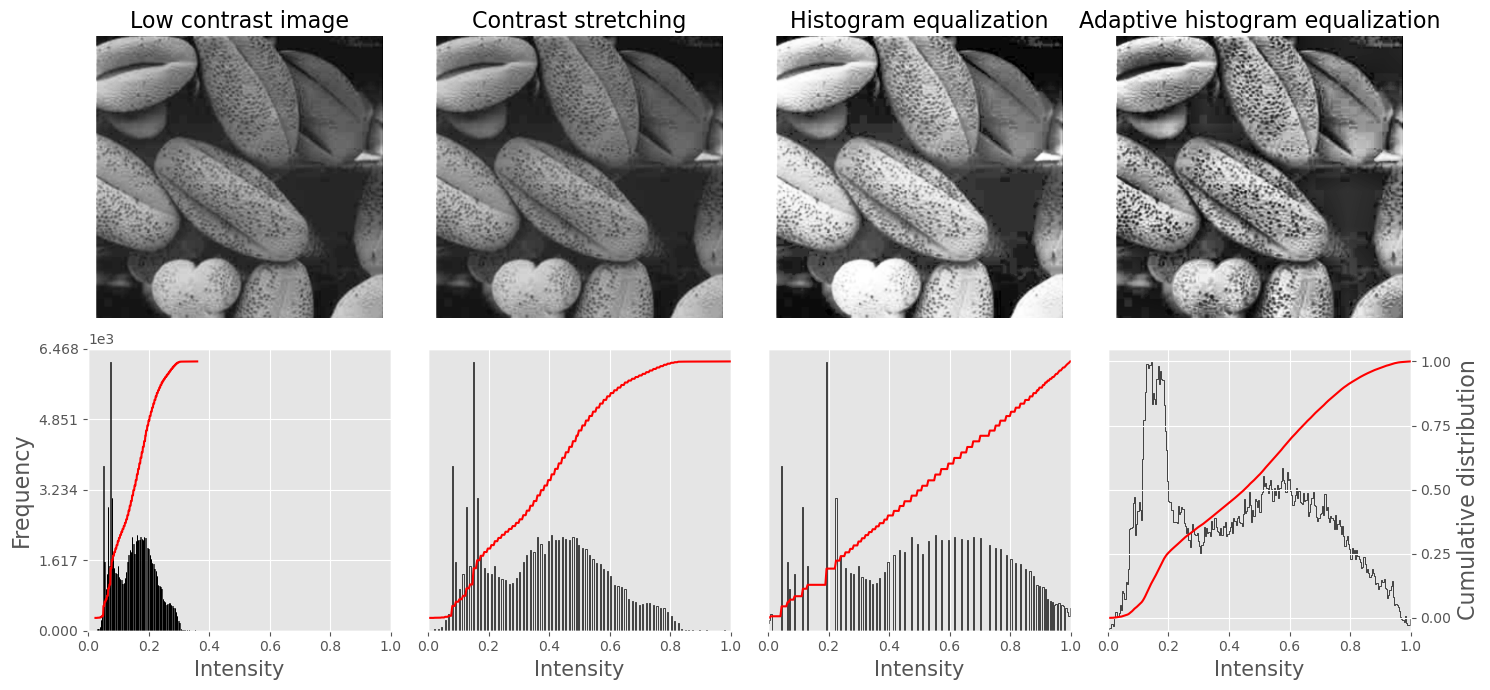

In [7]:
def plot_image_and_hist(image, axes, bins=256): 
    image = img_as_float(image)
    axes_image, axes_hist = axes
    axes_cdf = axes_hist.twinx()
    axes_image.imshow(image, cmap=plt.cm.gray)
    axes_image.set_axis_off() 
    axes_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    axes_hist.set_xlim(0, 1)
    axes_hist.set_xlabel('Intensity', size=15)
    axes_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    axes_hist.set_yticks([])
    image_cdf, bins = exposure.cumulative_distribution(image, bins)
    axes_cdf.plot(bins, image_cdf, 'r')
    axes_cdf.set_yticks([])
    return axes_image, axes_hist, axes_cdf
    
im = imread('chap3_images/pollen_1.png', as_gray=True)
# contrast stretching
im_rescale = exposure.rescale_intensity(im, in_range='image', out_range='dtype')
im_eq = exposure.equalize_hist(im) # histogram equalization
im_adapteq = exposure.equalize_adapthist(im, clip_limit=0.03) # adaptive histogram equalization

fig = plt.figure(figsize=(15, 7))
axes = np.zeros((2, 4), dtype = object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4): 
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4): 
    axes[1, i] = fig.add_subplot(2, 4, 5+i)
axes_image, axes_hist, axes_cdf = plot_image_and_hist(im, axes[:, 0])
axes_image.set_title('Low contrast image', size=16)
y_min, y_max = axes_hist.get_ylim()
axes_hist.set_ylabel('Frequency', size=16)
axes_hist.set_yticks(np.linspace(0, y_max, 5))
axes_image, axes_hist, axes_cdf = plot_image_and_hist(im_rescale, axes[:,1])
axes_image.set_title('Contrast stretching', size=16)
axes_image, axes_hist, axes_cdf = plot_image_and_hist(im_eq, axes[:, 2])
axes_image.set_title('Histogram equalization', size=16)
axes_image, axes_hist, axes_cdf = plot_image_and_hist(im_adapteq, axes[:,3])
axes_image.set_title('Adaptive histogram equalization', size=16)
axes_cdf.set_ylabel('Cumulative distribution', size=16)
axes_cdf.set_yticks(np.linspace(0, 1, 5))
fig.tight_layout()
plt.show()